The learning loss for the first round is​ 9 0.6869521103975673


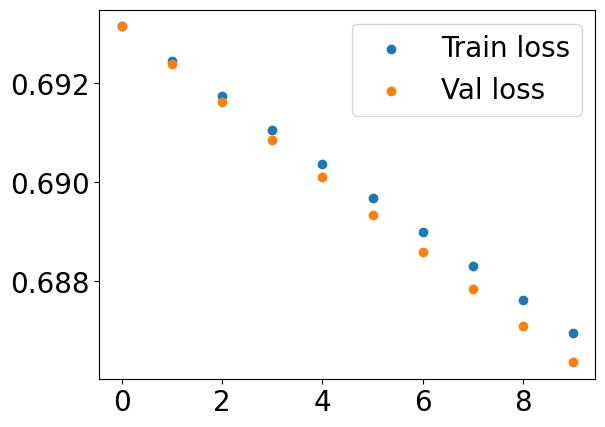

The learning loss for the first round is​ 1999 0.6883411717082134


C:\Users\Mohammed Khalil\AppData\Local\Temp\ipykernel_15060\931155798.py:143: UserWarning: No contour levels were found within the data range.
  plt.contour(mesh_f0, mesh_f1, y_pred)


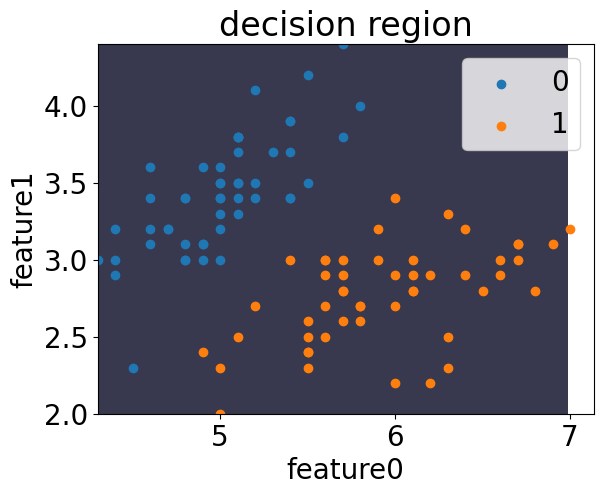

In [37]:
# Assignment: Logistic regression
# Objectives:
# 1. Understanding logistic regression through scratch
# 2. Learn the basics about classification problems
# -----------------------------------------------------

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


class ScratchLogisticRegression():
    
    def __init__(self, num_iter, lr, bias, verbose,lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    # Problem 5: learning and estimation
    # ----------------------------------
    def fit(self, X, y, X_val, y_val): 
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
            pred = self._logistic_hypothesis(X)
            pred_val = self._logistic_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
        if self.verbose == True:
            print('The learning loss for the first round is​ {} {}'.format(i,loss))
        pass

    # Problem 2: Steepest descent method 
    # ----------------------------------
    def _gradient_descent(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
        self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)
    
    # Problem 1: Sigmoid Function
    # ----------------
    def _sigmoid(self,y):   
        return 1 / (1 + np.exp(-y))

    # Problem 1: Logistuc Hypothesis
    # -------------------
    def _logistic_hypothesis(self, X):
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
    
    # Problem 3: estimation
    # ---------------------
    def predict_proba(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred


    def predict(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return  np.where(self._logistic_hypothesis(X) >= 0.5,1,0)
        
    # Problem 4: Objective function   
    # -----------------------------
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss                        
    
# Data preparation 
# -----------------
iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Run
# ---
slr = ScratchLogisticRegression(num_iter=10, lr=0.01, bias=True, verbose=True,lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

# Predict
# -------
slr.predict(X_test)

# Problem 6: Plot of learning curve 
# ---------------------------------
#plt.plot(slr.loss)
#plt.plot(slr.val_loss)

plt.rcParams["font.size"] = 20
plt.scatter(range(len(slr.loss)),slr.loss,label='Train loss')
plt.scatter(range(len(slr.val_loss)),slr.val_loss,label='Val loss')
plt.legend()
plt.plot();
plt.show()

X = iris.data[:100,:2]
y = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001,bias=True,verbose=True,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

# Problem 7: Visualization of decision area
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    #plt.contourf(mesh_f0, mesh_f1, y_pred, cmap = ListedColormap(['pink', 'skyblue']))
    plt.contourf(mesh_f0, mesh_f1, y_pred, cmap = "bone")
    plt.contour(mesh_f0, mesh_f1, y_pred)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

decision_region(X,y,slr)

# Problem 8: (Advance assignment) Saving weights
# ----------------------------------------------
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.savez(outfile, slr.theta)
import pickle
dbfile = open('example', 'ab')
pickle.dump(slr.theta, dbfile)                     
dbfile.close()
dbfile = open('example', 'rb')     
pickle.load(dbfile)
dbfile.close()